<a href="https://colab.research.google.com/github/ClaudiodeItaperuna/Sgmoidal_data_science/blob/main/Copy_of_Copy_of_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Atenas*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Atenas, e ver quais insights podem ser extraídos a partir de dados brutos.**


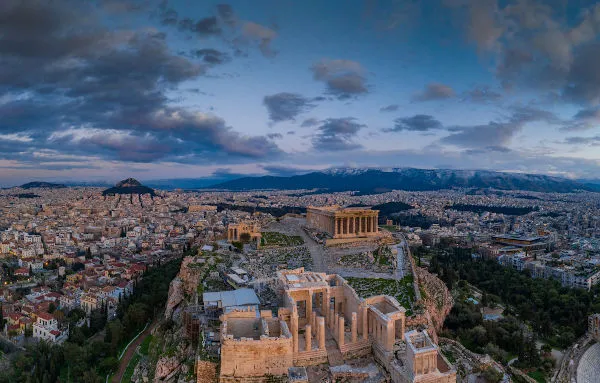

**Atenas foi um grande centro cultural. E consideada o berco da democracia, bem como a cidade em que floresceram a filosofia,o teatro, a arte e a vida urbana na Grrecia. Dessa forma as pessoas com interessem em visitar a cidade tem grande interesse na cultura.**

## Obtenção dos Dados


In [32]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/greece/attica/athens/2022-12-27/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel;
* name - nome da propriedade anunciada;
* host_id - númreo do id do proprietário (anfitrião) da propriedade;
* neighbourhood_group - esta coluna não contém nenhum valor válido;
* neighbourhood - nome do bairro;
* latitude - coordenada da latitude da propriedade;
* longitude - coordenada da longitude da propriedade;
* room_type - informao tipo de quarto que é oferecido;
* price - preço para alugar o imóvel;
* minimum_nights - qunatidade mínima de noites para reservar;
* numbers_of_reviews - número de reviews que a propriedade possui;
* last_review - data do último review;
* reviews_per_month - quantidade de reviews que a propriedade possui;
* calculated_host_listings_count - quantidade de omóveis do mesmo anfitrião;
* availability_365 - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [37]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,81,1,34,2022-07-02,0.24,7,0,2,00000957568
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,75,1,63,2022-07-22,0.50,7,277,9,00001070920
2,502842,"Walk to Plaka. Εnjoy the green, roof top terrace!",1418201,D & Y Boutique Athens,NaN,ΚΕΡΑΜΕΙΚΟΣ,37.98020,23.72357,Entire home/apt,87,2,7,2021-10-17,0.08,46,257,0,00001815276
3,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,60,1,87,2022-06-13,0.70,7,111,11,00000957080
4,502879,"Garden apt, next to Plaka. Roof top terrace!",1418201,D & Y Boutique Athens,NaN,ΚΕΡΑΜΕΙΚΟΣ,37.98020,23.72357,Entire home/apt,67,2,24,2022-10-01,0.21,46,286,4,Exempt


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [24]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	11056
Variáveis:	18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [25]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.160185
last_review                       0.160185
license                           0.074077
name                              0.000181
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

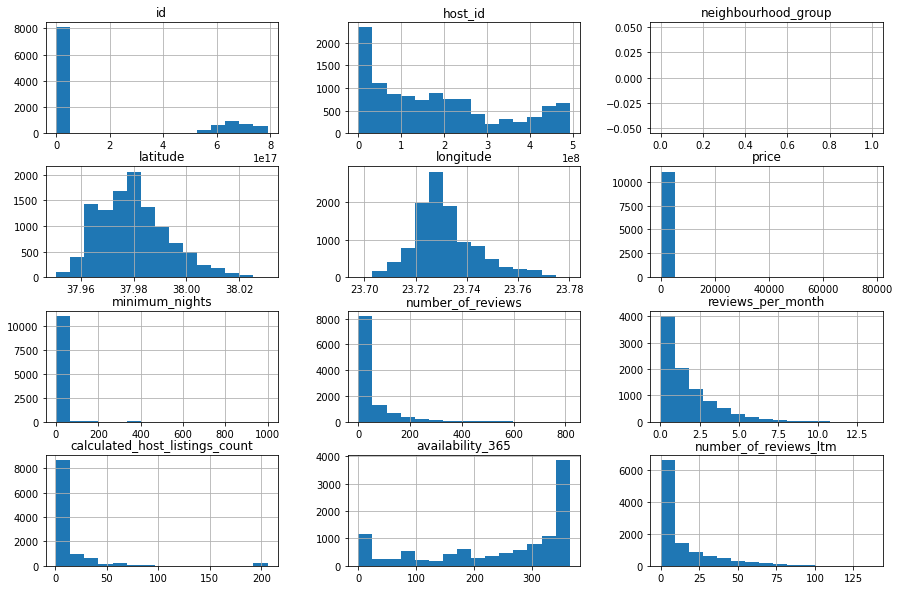

In [26]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [27]:
# ver a média da coluna `price``
df.price.mean()

120.36731186685962

### **Q4. Qual a correlação existente entre as variáveis**

In [28]:
# criar uma matriz de correlação
df.corr()
# mostrar a matriz de correlação


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.373641,NaN,0.039875,0.007209,-0.005872,-0.035855,-0.306728,0.088583,0.024219,0.148924,-0.206415
host_id,0.373641,1.000000,NaN,0.027939,-0.026022,0.001132,-0.042744,-0.251004,0.028174,-0.227298,0.121652,-0.106716
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.039875,0.027939,NaN,1.000000,0.188865,-0.013011,0.019709,-0.109090,-0.116453,-0.037309,-0.040472,-0.128031
longitude,0.007209,-0.026022,NaN,0.188865,1.000000,-0.005289,0.020939,-0.094269,-0.140271,-0.030854,-0.023043,-0.132609
price,-0.005872,0.001132,NaN,-0.013011,-0.005289,1.000000,0.006497,-0.003553,-0.009596,-0.008179,0.004303,-0.007061
minimum_nights,-0.035855,-0.042744,NaN,0.019709,0.020939,0.006497,1.000000,-0.022090,-0.053181,-0.029266,-0.020330,-0.055037
number_of_reviews,-0.306728,-0.251004,NaN,-0.109090,-0.094269,-0.003553,-0.022090,1.000000,0.632101,-0.014000,-0.026347,0.711150
reviews_per_month,0.088583,0.028174,NaN,-0.116453,-0.140271,-0.009596,-0.053181,0.632101,1.000000,0.032472,0.044913,0.840177
calculated_host_listings_count,0.024219,-0.227298,NaN,-0.037309,-0.030854,-0.008179,-0.029266,-0.014000,0.032472,1.000000,-0.110457,0.047720


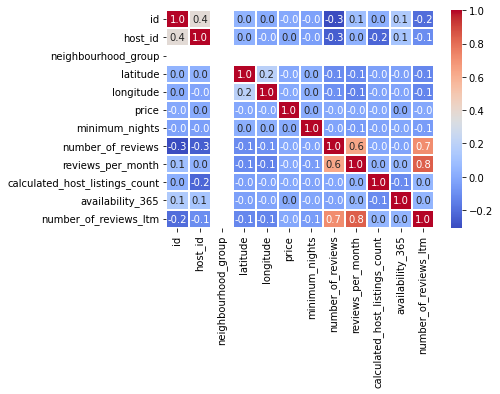

In [29]:
# plotar um heatmap a partir das correlações
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.1f', linewidths=0.015,
            vmax=1.0, square=False, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.loc[df.availability_365.isin(df['availability_365'])]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,81,1,34,2022-07-02,0.24,7,0,2,00000957568
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,75,1,63,2022-07-22,0.50,7,277,9,00001070920
2,502842,"Walk to Plaka. Εnjoy the green, roof top terrace!",1418201,D & Y Boutique Athens,NaN,ΚΕΡΑΜΕΙΚΟΣ,37.980200,23.723570,Entire home/apt,87,2,7,2021-10-17,0.08,46,257,0,00001815276
3,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,60,1,87,2022-06-13,0.70,7,111,11,00000957080
4,502879,"Garden apt, next to Plaka. Roof top terrace!",1418201,D & Y Boutique Athens,NaN,ΚΕΡΑΜΕΙΚΟΣ,37.980200,23.723570,Entire home/apt,67,2,24,2022-10-01,0.21,46,286,4,Exempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,786016859112648261,Grand apartment in Parliament square,113604662,Nikos,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.973230,23.732500,Entire home/apt,117,2,0,NaN,NaN,19,365,0,00001803571
11052,786103175885866625,Acropolis from my bed,201446024,John,NaN,ΚΕΡΑΜΕΙΚΟΣ,37.980378,23.716034,Entire home/apt,56,1,0,NaN,NaN,1,277,0,00001803592
11053,786113546816947304,Athenaeum Eridanus Luxury Deluxe Room Double,444120275,Georgios,NaN,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.981190,23.719630,Private room,129,1,0,NaN,NaN,17,304,0,1124058
11054,786153199004883905,Amazing Koukaki 1br nr Metro,221534605,Blueground,NaN,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,37.964700,23.724804,Entire home/apt,46,30,0,NaN,NaN,13,359,0,1754633


In [31]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_tipos_de_imovel = df.groupby('room_type')['room_type'].count()
df_tipos_de_imovel = df_tipos_de_imovel = df_tipos_de_imovel / df_tipos_de_imovel.sum()
df_tipos_de_imovel * 100


room_type
Entire home/apt    88.693922
Hotel room          1.239146
Private room        9.352388
Shared room         0.714544
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [20]:
    # ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
ΡΗΓΙΛΛΗΣ                            275.833333
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ            185.857143
ΒΟΤΑΝΙΚΟΣ                           174.931507
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 170.906348
ΘΗΣΕΙΟ                              165.764179
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    155.366516
ΖΑΠΠΕΙΟ                             154.741497
ΓΟΥΒΑ                               148.172414
ΚΟΛΩΝΑΚΙ                            139.743869
ΑΚΡΟΠΟΛΗ                            135.408163
Name: price, dtype: float64

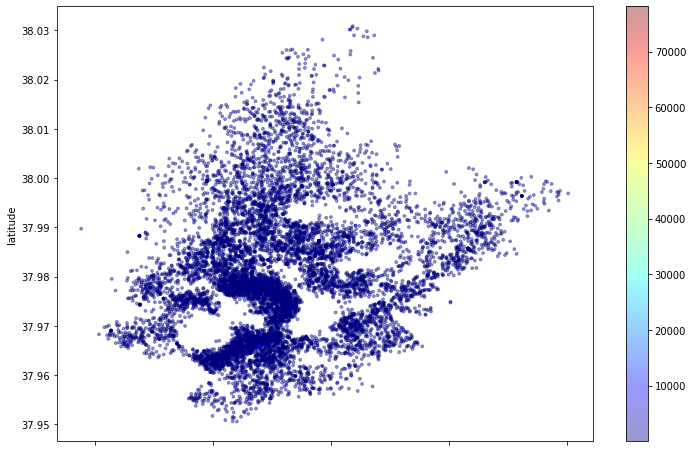

In [33]:
df.plot(kind="scatter", x = 'longitude', y = 'latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12, 8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df.groupby('minimum_nights').price.mean().sort_values(ascending = True)

minimum_nights
26        10.000000
55        19.500000
250       22.000000
27        24.000000
29        24.000000
11        25.000000
201       27.000000
60        29.888889
13        32.000000
8         32.666667
21        33.000000
90        37.875000
25        38.444444
365       38.555556
364       39.000000
66        40.000000
222       44.000000
240       45.000000
35        45.500000
31        48.000000
50        50.000000
800       50.000000
84        50.000000
182       50.000000
30        50.046154
18        52.000000
15        52.459459
17        55.000000
28        57.266667
14        57.900000
20        67.033333
444       69.000000
10        71.062500
100       71.500000
5         73.424528
1000      79.000000
80        86.000000
6         89.900000
45        90.000000
3         93.893468
4         95.354717
7         96.705882
184      100.000000
2        121.133929
200      125.000000
1        133.322185
180      140.000000
150      150.000000
120      150.000000
9    

## Conclusões


Atenas foi um grande centro cultural. E consideada o berco da democracia, bem como a cidade em que floresceram a filosofia,o teatro, a arte e a vida urbana na Grrecia. Dessa forma as pessoas com interessem em visitar a cidade tem grande interesse na cultura.

Apos uma analise realizada com os dados disponiveis, foi identificada uma grade concentracao de casas e apartamentos para aluguel na cidade de Atenas, com o preco medio por diaria de 120 euros. Foi identificado mais de 80% do total dos registros no Airbnb. Existe uma grande oferta visto que a maior parte da receita do pais e da cidade estao diretamente ligados ao turismo. 

Existem tambem registros mais afastados, conforme mostrado no grafico de latitude e longitude, o que e compreensivel para atender a todos os gostos e orcamentos, assim consegue atingir um maior volume de turistas na regiao.